In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
#engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# reflect an existing database into a new model
base = automap_base()
base.prepare(engine, reflect = True)

# reflect the tables
# We can view all of the classes that automap found
base.classes.keys()


['measurement', 'station']

In [27]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

<class 'sqlalchemy.ext.automap.measurement'>


In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [41]:
# get max date to count 12 months backwards
max_date=session.query(measurement.date).order_by((measurement.date).desc()).first()

max_date = dt.datetime.strptime(max_date[0], '%Y-%m-%d')


In [48]:
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prc_12 = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= max_date-dt.timedelta(days=365)).group_by(measurement.date).all()

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

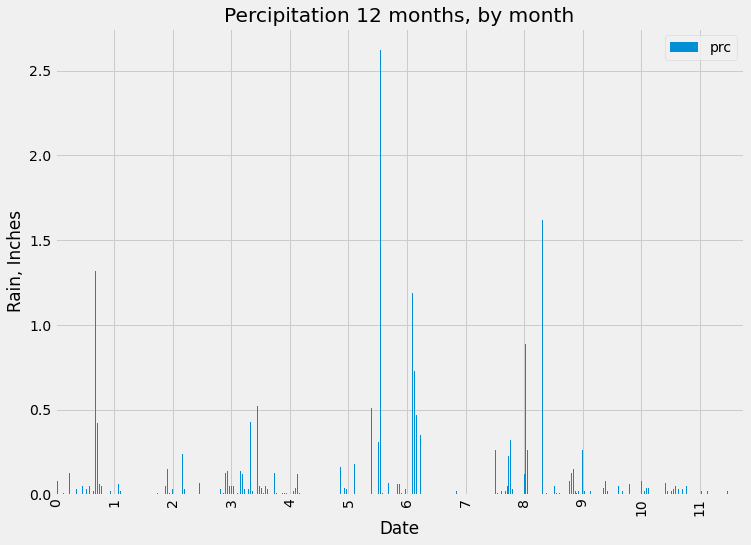

In [58]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prc_df = pd.DataFrame(prc_12, columns=['date', 'prc']).sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
axis = prc_df.plot(kind='bar', figsize=(11,8))
plt.locator_params(axis='x', nbins=12)
plt.title('Percipitation 12 months, by month')
plt.xlabel('Date')
plt.ylabel('Rain, Inches')
plt.show()

In [59]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prc_df.describe()

,prc
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [60]:
# Design a query to show how many stations are available in this dataset?
session.query(station).count()

9

In [66]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stn_list=session.query(measurement.station, func.count(measurement.station)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [72]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == stn_list[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

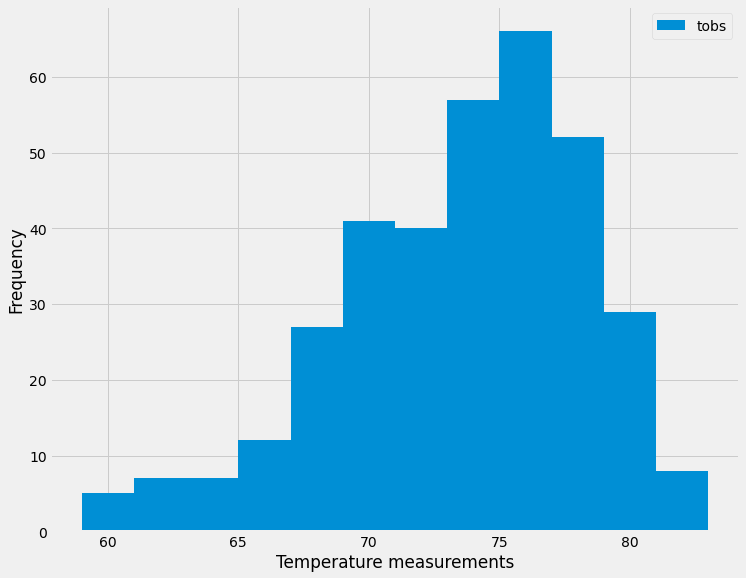

In [84]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prc_12_stn = session.query(measurement.station, measurement.tobs).\
    filter(measurement.date >= max_date-dt.timedelta(days=365)).\
        filter(measurement.station==stn_list[0][0]).all()

prc_12_stn_df = pd.DataFrame(prc_12_stn).set_index('station')
ax = prc_12_stn_df.plot.hist(bins=12, figsize=(11,9))
plt.xlabel('Temperature measurements')
plt.show()